# Tarea 1: Visión Computacional

ME4707 - Robótica - Semestre 2021-2

Profesor: Juan C. Zagal - Auxiliar: Raimundo Lorca - Laboratorios: Gaspar Fábrega

# Instalación


## 1. Google Colab
En esta tarea, que se trabajará durante los primeros cuatro laboratorios computacionales, se utilizará Python 3 y la librería de visión computacional OpenCV. La forma más fácil de tener un ambiente de desarrollo de Python con todas las bibliotecas más comunes es utilizar **Google Colaboratory**. Colaboratory es un entorno Jupyter notebook gratuito que se ejecuta completamente en la nube. Puede escribir y ejecutar código, y solo requiere de una cuenta google.

https://colab.research.google.com/notebooks/welcome.ipynb

Debe trabajar sobre este mismo archivo .ipynb completando lo que se solicita en cada problema.

## 2. OpenCV
En esta tarea se utilizará principalmente **OpenCV**. La Open Source Computer Vision es una librería especializada en herramientas de visión computacional y en todo lo que respecta a visión artificial en general. De este modo provee de funcionalidades de todo tipo de complejidad, desde operaciones básicas de procesamiento de imágenes, hasta algoritmos de reconocimiento de objetos.

<img src="https://raw.githubusercontent.com/cherrerab/roboticafcfm/master/auxiliar_01/bin/opencv_logo.png" height="200">

Por supuesto, esta librería cuenta con su documentación correspondiente. En esta puede encontrar descripciones más detalladas de sus funcionalidades, así como también ejemplos, tutoriales y otros.

https://docs.opencv.org/master/

Debido a conflictos de patentes, el 2018 la implementación de SIFT en OpenCV fue retirada de la librería. No obstante, dado que la patente de SIFT expiró en Marzo del 2020, esta ha vuelto a ser incluida en los builds más recientes de `opencv-contrib`.

De esta forma, para utilizarla durante la tarea, instalaremos la siguiente version de OpenCV en el entorno de Colab, para asegurarnos de poder utilizar SIFT.

In [1]:
!pip install opencv-python==4.5.1.48 opencv-contrib-python==4.5.1.48

     |████████████████████████████████| 50.4 MB 15 kB/s 
     |████████████████████████████████| 56.3 MB 42 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


##3. Github

Para facilitar la carga de los archivos y las utilidades necesarias para completar la tarea, se ha habilitado un directorio en el github del curso `roboticafcfm`. Para clonar el repositorio en el entorno de Colab solo debe ejecutar el siguiente bloque de código.

In [2]:
!git clone https://github.com/gasparzilla/roboticafcfm.git
%cd /content/roboticafcfm

Cloning into 'roboticafcfm'...
remote: Enumerating objects: 1115, done.
remote: Counting objects: 100% (427/427), done.
remote: Compressing objects: 100% (424/424), done.
remote: Total 1115 (delta 198), reused 0 (delta 0), pack-reused 688
Receiving objects: 100% (1115/1115), 42.86 MiB | 38.88 MiB/s, done.
Resolving deltas: 100% (387/387), done.
/content/roboticafcfm


# Introducción
A finales del 2017, el equipo de DeepMind introdujo AlphaZero, un sistema de inteligencia artificial que, mediante una arquitectura de deep learning, es capaz de lograr en pocas horas de entrenamiento niveles sobre-humanos en juegos tales como el ajedrez y el Go. En particular en el caso del ajedrez, AlphaZero logró dominar a Stockfish después de tan solo 4 horas de autoaprendizaje, sin acceso a libros de apertura o base de datos de tablas de finales.

<img src="https://lh3.googleusercontent.com/kFsqNQX_cQ2bLof_G_2UKCuSwDT34PcZpC8nNHDwaiGFteedmYbJODRnUXz8t_zdCemoWPAX_JxtkjfFHdBKhf819GDxiruo4HYYug=w1440-rw-v1" height="240">

No obstante, hasta el momento AlphaZero es completamente incapaz de interactuar por si solo con el mundo real, pues su arquitectura de redes neuronales está diseñada únicamente para su sistema de aprendizaje. Así, para complementar a AlphaZero resulta necesario implementar un sistema de visión computacional que le permita interpretar la información espacial de su entorno y de esta manera reconocer, por ejemplo, la posición de un tablero de ajedrez.

En esta tarea trabajarán en la implementación de un `pipeline` que permita la interpretación de la posición de un tablero de ajedrez a partir de su fotografía. Por supuesto, esta implementación comprende el desarrollo de subetapas que irán resolviendo individualmente a lo largo de la tarea, como se muestra en la imagen a continuación.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A1.png" width="1000">

---
# 1. Detectar Bordes (1 pt)

Las imágenes de tableros de ajedrez con las que trabajarán en la tarea se encuentran en la carpeta `tarea_01/chessboards` dentro del github del curso. Por ejemplo, en el siguiente bloque de código cargaremos una imágen de muestra de esta carpeta.

(-0.5, 1072.5, 1072.5, -0.5)

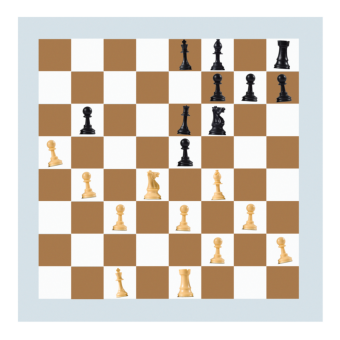

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# directorio que contiene las imágenes de referencia
img_path = 'tarea_01//chessboards//board_v2_2.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# visualizar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

El objetivo de esta etapa consiste en aislar los bordes de la imagen tal de posteriormente poder reconocer las rectas que definen el cuadriculado del tablero mediante la Transformada de Hough.

Para lograr esto se recomienda seguir el procedimiento descrito en el siguiente bloque de pseudocódigo.

```
Algoritmo 1: Detección de Bordes(img)
------------------------------------
  Convertir imagen a HSV
  Segmentar color de las casillas oscuras -> mask
  Utilizar detección de bordes Canny o Sobel
  Retornar bordes
```

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A2.png" height="250">

Implemente este algoritmo en la función `detectEdges(img)`, la cual debe recibir una imágen en RGB y retornar la imágen binaria de bordes resultante. Por supuesto, puede utilizar la implementación de Canny en OpenCV `cv2.Canny`.

[Canny Edge Detection OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

Muestre sus resultados.


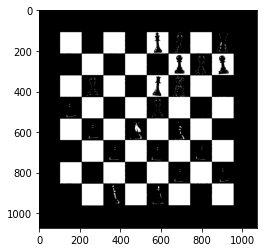

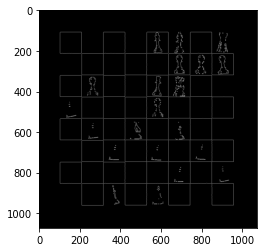

In [28]:
"""
def detectEdges(img):
  imgG = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  imgB = cv2.inRange(imgG, 100, 160)

  imgB = np.uint8(imgB) 

  edges = cv2.Canny(imgB,0,1)
  
  return edges


plt.figure()
plt.imshow(imgG, cmap='gray')
plt.figure()
plt.imshow(edges, cmap='gray')
  def detectEdges(img):  return edges
"""
def detectEdges(img):
  imgG = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

  plt.figure()
  plt.hist(imgG.flatten())

  imgB = cv2.inRange(imgG, 100, 160)
  imgB = np.uint8(imgB)

  plt.figure()
  plt.imshow(imgB, cmap='gray')

  edges = cv2.Canny(imgB,0,1)
  plt.figure()
  plt.imshow(edges, cmap='gray')

  return edges

plt.figure()
plt.imshow(imgB, cmap='gray')
plt.figure()
plt.imshow(edges, cmap='gray')
# ---
# Mostrar Resultados

---
# 2. Detectar Rectas (1.5 pts)

Para lograr esta etapa de procesamiento utilizaremos la implementación de OpenCV de la Transformada de Hough, `cv2.HoughLines`.

[Hough Line Transform OpenCV](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html)

No obstante, es probable que al usar esta función, la transformada retorne más de un recta para el mismo borde en la imagen. Así, es necesario filtrar la lista de rectas resultantes con la finalidad de retornar una única recta por cada borde real en la imagen.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A3.png" height="250">

Nuevamente, se recomienda seguir el siguiente bloque de pseudocódigo.

```
Algoritmo 2: Detección de Rectas(img)
-------------------------------------
  Utilizar HoughLines sobre la imagen -> lines
  Reestructurar lines en dos np.array -> rho, theta
  Inicializar una lista vacía -> rectas

  for r, t in zip(rho, theta)
    Encontrar los index en rho y theta que cumplan la condición:
      (abs(rho - r) < 100) and (abs(theta - t) < pi/3)

    Promediar rho[index] -> rho_mean
    Promediar theta[index] -> theta_mean

    Si (rho_mean, theta_mean) no se ha agregado a rectas:
      Agregar (rho_mean, theta_mean) a rectas

  Retornar rectas
```

Implemente este algoritmo en la función `getLines(img)`, la cual debe recibir una imágen binaria de bordes y retornar la lista `rectas`.

Para obtener los index de un `np.array` que cumplan con alguna condición pueden utilizar la función `np.where`, mientras que para remover los index de un arreglo numérico pueden usar `np.delete`.




[]


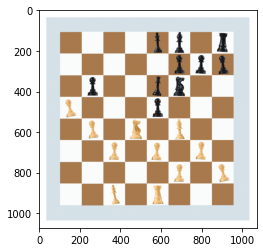

In [211]:
from utils import plot_lines


"""
  -> rectas

  retorna una lista con tuplas (rho, theta) que describen las rectas
  presentes en la imagen de bordes ingresadas.
    [(rho0, theta0), (rho1, theta1), (rho2, theta2), ...]

  :param np.array img:
    imagen binaria 8-bits de bordes.
  
  :returns list(tuple) rectas:
    lista de tuplas (rho, theta).

       


     
          

"""




def getlines(img):
  rho=[]
  theta=[]
  rectas=[]
  lines = cv2.HoughLines(edges, rho=1.0, theta=np.pi/360, threshold=250)
  imglineas = np.copy(img)
  for i in range(len(lines)):
    rho[i]=np.append(rho,lines[i][0][0])
    theta[i]=np.append(theta,lines[i][0][1]) 
  for r, t in zip(rho, theta):
      indice = np.where((abs(rho - r) < 100) & (abs(theta - t) < np.pi/3))
      a = np.mean(rho[indice])
      b = np.mean(theta[indice])
      rectas.append([a,b])
  for i in range(len(lines)):
    for rho1, theta1 in lines[i]:
      a = np.cos(theta1)
      b = np.sin(theta1)
      x0 = a*rho1
      y0 = b*rho1
      x1 = int(x0 + 1000*(-b))
      y1 = int(y0 + 1000*(a))
      x2 = int(x0 - 1000*(-b))
      y2 = int(y0 - 1000*(a))  
      color = (255, 0, 0)
      thickness = 2
      imglineas = cv2.line(imglineas, (x1, y1), (x2, y2), color, thickness)  
  return rectas  
 

print(rectas)
plt.figure()
plt.imshow(imglineas)





# ---
# Mostrar resultados


Para facilitar la visualización del resultado de su implementación, en el github se ha incorporado la función `plot_lines(img, lines)` que le permitirá plotear la rectas resultantes de la función `getLines` sobre una imagen.

(-0.5, 1072.5, 1072.5, -0.5)

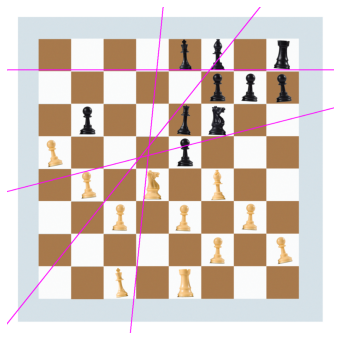

In [214]:
from utils import plot_lines
# cargar imagen en rgb
img_path = 'tarea_01//chessboards//board_v2_2.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# plotar rectas
lines_test = [ (650, 0.674), (590, 1.32), (510, 0.1), (210, 1.57) ]
plt.figure(figsize=(6,6))
plot_lines(img, lines_test)
plt.axis('off')

---
# 3. Detectar Esquinas
Con la finalidad de reducir la carga de trabajo de esta tarea, esta etapa en el procesamiento se encuentra completamente implementada en el github.

La función `get_intersections` permite obtener los pares de coordenadas `(x, y)` que describen los puntos de intersección de rectas dentro de la imagen. Es importante notar que las coordenadas resultantes vienen ordenadas en la secuencia presentada en la imagen a continuación.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A4.png" height="250">

Por otro lado, también se incluye la función `plot_corners(img, corners)` que, del mismo modo que `plot_lines`, permite plotear los puntos de intersección al interior de la imagen.



In [138]:
from utils import get_intersections, plot_corners

# cargar imagen en rgb
img_path = 'tarea_01//chessboards//board_v2_2.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# obtener puntos de intersección
lines_test = [ (650, 0.674), (590, 1.32), (510, 0.1), (210, 1.57) ]
corners = get_intersections(img, lines)

# plotear esquinas
plt.figure(figsize=(6, 6))
plot_corners(img, corners)
plt.axis('off')

ValueError: ignored

---
# 4. Extraer Casilla (1 pt)

Teniendo presente el patrón en que las esquinas son retornadas de la función `get_intersections`, el objetivo de esta etapa consiste en determinar la secuencia de puntos que que describe el contorno de una casilla en el tablero, en función de la posición de la casilla. Por ejemplo si se quiere aislar la casilla `(2, 4)` del tablero, la secuencia de puntos que describe su contorno es la serie `[22, 23, 32, 31]`.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A5.png" height="250">

Implemente la función `getSquare(row, col, img, corners)` que a partir de la posición `(row, col)`, esta retorna una imagen con la casilla correspondiente completamente aislada. Para facilitar este trabajo, se propone utilizar la informacion almacenada en los contornos obtenidos, para aislar una region especifica de la imagen:

In [ ]:
# cargar imagen en rgb
img_path = 'tarea_01//chessboards//board_v2_2.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# contorno de ejemplo
contour = np.array( [[100, 100], [500, 100], [500, 500], [100, 500]] )

# Extraer region de la imagen
img_mask = img[contour[3][0]:contour[1][0], contour[1][1]:contour[3][1]]

# visualizar imagen
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_mask)
plt.axis('off')

De la misma manera que en los algoritmos anteriores, puede guiarse del siguiente bloque de pseudocódigo.

```
Algoritmo 3: Segmentación Casilla(row, col, img, corners)
---------------------------------------------------------
  Determinar secuencia de puntos del contorno -> index
  Obtener serie de coordenadas corners[index] -> contour
  Extraer region desde la imagen original
```

In [ ]:
def getSquare(row, col, img, corners):
  """
  -> out

  retorna una imagen con la casilla correspondiente a la
  posición (row, col) completamente aislada.

  :param int row:
    fila de la casilla de interés.
  :param int col:
    columna de la casilla de interés.
  :param np.array img:
    imagen 8-bits en RGB.
  :param np.array corners:
    arreglo numérico de la forma (ncorners, 2) con los pares
    de coordenadas (x, y) que describen la posición de las
    esquinas en el tablero.

  :returns np.array out:
    imagen 8-bits en RGB con solamente la casilla de interés.
  """

  return out

# ---
# Mostrar resultados


---
# 5. Identificar Pieza (2 pts)
Una vez tenemos la capacidad de asilar cada una de las casillas del tablero, podemos ir recorriendo este para ir identificando las piezas presentes en la posición.

Considerando como entrada la imagen resultante de la función `getSquare`, implemente la función `identifyPiece(img)` la cual, mediante SIFT, debe determinar el nombre de la pieza presente en la imagen.

<img src="https://raw.githubusercontent.com/gasparzilla/roboticafcfm/master/tarea_01/imagesB/BP1A6.png" height="250">

Para esto considere que en la carpeta `tarea_01/pieces` se encuentran 12 imágenes de la forma `('white_knight.png', 'black_queen.png', 'white_pawn.png', 'black_rook.png')` las cuales contienen distintas imágenes de referencia para comparar mediante SIFT. Recuerde que la librería `os` provee funcionalidades como `os.listdir`, `os.path.join` y `os.path.splitext` que le ayudarán a recorrer y a obtener los nombres de estas imágenes.

Considere el siguiente bloque de pseudocódigo como guía para la implementación de la función.

```
Algoritmo 4: Identificar Pieza(img)
---------------------------------------------------------
  Obtener descriptores de SIFT de img -> (kps, des)
  Obtener lista de imágenes de referencia ->ref_imgs
  Inicializar lista de nombres de piezas -> names
  Inicializar lista acumuladora de votos -> votes

  for i, ref_img in enumerate(ref_imgs)
    Agregar nombre de la pieza a names[i]
    Obtener descriptores de SIFT -> (kps_ref, des_ref)
    Obtener matches entre (des, des_ref)
    Por cada buen match agregar un voto a votes[i]

  Obtener mayor cantidad de votos -> max_votes
  Si max_votes es mayor a un umbral
    Retornar name con mayor cantidad de votos
  
  Retornar 'empty'
```

Note que este algoritmo es un tanto ineficiente, pues los descriptores de las imágenes de referencia serán calculados cada vez que se utilice la función. Si lo desea, puede calcular los features de referencia previamente y luego ingresarlos a la función como `identifyPiece(img, names, ref_features)` para ahorrar costo computacional.

In [ ]:
import os

def identifyPiece(img):
  """
  -> name

  retorna el nombre de la pieza presente en la imagen ingresada.
  si no hay ninguna pieza, se retorna 'empty'.

  :param np.array img:
    imagen 8-bits en RGB de la casilla aislada.

  :returns str name:
    nombre de la pieza presente en la imagen.
  """
  
  return 'empty'

# 6. Evaluación
Si ha implementado correctamente todas las funciones solicitadas, el siguiente bloque de código debiese retornar una renderización de la posición identificada en el tablero.

No es estrictamente necesario que el programa logre clasificar al 100% las piezas presentes, pero comprobamos que si es posible, por lo menos para la imagen seleccionada `tarea_01//chessboards//board_v2_2.png` . Intenten apuntar a la detección de todas las piezas.

Comparen el resultado obtenido con la imagen original.

In [ ]:
from utils import get_intersections
from utils.chess import ChessBoard

# incializar tablero
board = ChessBoard()

# cargar imagen de tablero real
img_path = 'tarea_01//chessboards//board_v2_2.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# obtener rectas
edges = detectEdges(img)
lines = getLines(edges)

# obtener corners
corners = get_intersections(img, lines)

# procesar cada casilla del tablero
for i in range(8):
  for j in range(8):
    # generar img de la casilla
    piece = getSquare(j, i, img, corners)

    name = identifyPiece(piece)
    if name == 'empty':
      continue

    # agregar al tablero
    board.drawPiece(name, position=(i, j))

# visualizar tablero
board.plot()

Para mostrar que el código no siempre es infalible, se tiene un ejemplo donde debería fallar. Pruebe ahora aplicar la funcion anterior con la imagen `tarea_01//chessboards//board_v2_1.png`. 

Comente las razones por las que podría estar fallando y proponga una solución.

In [ ]:
from utils import get_intersections
from utils.chess import ChessBoard

# incializar tablero
board = ChessBoard()

# cargar imagen de tablero real
img_path = 'tarea_01//chessboards//board_v2_1.png'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# obtener rectas
edges = detectEdges(img)
lines = getLines(edges)

# obtener corners
corners = get_intersections(img, lines)

# procesar cada casilla del tablero
for i in range(8):
  for j in range(8):
    # generar img de la casilla
    piece = getSquare(j, i, img, corners)

    name = identifyPiece(piece)
    if name == 'empty':
      continue

    # agregar al tablero
    board.drawPiece(name, position=(i, j))

# visualizar tablero
board.plot()

#RESPUESTAS:
